# Garage Classifcation Model



## Goal: Given coordinate points along a path, classify whether the points are headed towards the garage.

## This notebook shows the results of training the model with 20 coordinate trajectories.

---

In [22]:
# Imports

import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
# get the main paths
df = pd.read_csv('../simulations/data/paths.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      104 non-null    int64  
 1   name                            104 non-null    object 
 2   latitude_1                      104 non-null    float64
 3   longitude_1                     104 non-null    float64
 4   altitude_relative_to_ground_1   104 non-null    float64
 5   latitude_2                      104 non-null    float64
 6   longitude_2                     104 non-null    float64
 7   altitude_relative_to_ground_2   104 non-null    float64
 8   latitude_3                      104 non-null    float64
 9   longitude_3                     104 non-null    float64
 10  altitude_relative_to_ground_3   104 non-null    float64
 11  latitude_4                      104 non-null    float64
 12  longitude_4                     104 

In [25]:
df.head()

,Unnamed: 0,name,latitude_1,longitude_1,altitude_relative_to_ground_1,latitude_2,longitude_2,altitude_relative_to_ground_2,latitude_3,longitude_3,...,latitude_18,longitude_18,altitude_relative_to_ground_18,latitude_19,longitude_19,altitude_relative_to_ground_19,latitude_20,longitude_20,altitude_relative_to_ground_20,enter-parking
0,0,1_A_Missed,36.109640,-115.140945,0.0,36.109676,-115.140893,0.0,36.109710,-115.140870,...,36.110660,-115.140983,0.0,36.110684,-115.141025,0.0,36.110713,-115.141055,0.0,0
1,1,2_A_Missed,36.109705,-115.140733,0.0,36.109702,-115.140785,0.0,36.109699,-115.140841,...,36.110548,-115.141190,0.0,36.110591,-115.141199,0.0,36.110651,-115.141182,0.0,0
2,2,3_A_Missed,36.109626,-115.140134,0.0,36.109675,-115.140140,0.0,36.109724,-115.140166,...,36.110686,-115.140910,0.0,36.110808,-115.140852,0.0,36.111009,-115.140862,0.0,0
3,3,4_A_Missed,36.109592,-115.140132,0.0,36.109662,-115.140159,0.0,36.109716,-115.140219,...,36.110981,-115.140853,0.0,36.111165,-115.140856,0.0,36.111302,-115.140917,0.0,0
4,4,5_A_Missed,36.109642,-115.141901,0.0,36.109649,-115.141793,0.0,36.109654,-115.141658,...,36.110958,-115.140852,0.0,36.111102,-115.140854,0.0,36.111243,-115.140892,0.0,0


In [26]:
# Get First Coordinate Pair Only
x = df[df.columns[2:62]]

y = df['enter-parking'].values

In [27]:
print(x)
print(y)


     latitude_1  longitude_1  altitude_relative_to_ground_1  latitude_2  \
0     36.109640  -115.140945                            0.0   36.109676   
1     36.109705  -115.140733                            0.0   36.109702   
2     36.109626  -115.140134                            0.0   36.109675   
3     36.109592  -115.140132                            0.0   36.109662   
4     36.109642  -115.141901                            0.0   36.109649   
..          ...          ...                            ...         ...   
99    36.111300  -115.139089                            0.0   36.111263   
100   36.111882  -115.140172                            0.0   36.111877   
101   36.109772  -115.139249                            0.0   36.109826   
102   36.109605  -115.139093                            0.0   36.109654   
103   36.109786  -115.139246                            0.0   36.109842   

     longitude_2  altitude_relative_to_ground_2  latitude_3  longitude_3  \
0    -115.140893       

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=95)

In [29]:
# Scale data
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [30]:
x_train.shape

(72, 60)

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Model creation
model = Sequential()

# 6 neurons for input layer
model.add(Dense(60, activation='relu'))

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam')

In [32]:
model.fit(x=x_train,
          y=y_train,
          epochs=300,
          validation_data=(x_test, y_test),
          callbacks=early_stop)

Epoch 1/300
3/3 [==============================] - 1s 63ms/step - loss: 0.7043 - val_loss: 0.6923
Epoch 2/300
3/3 [==============================] - 0s 8ms/step - loss: 0.6818 - val_loss: 0.6904
Epoch 3/300
3/3 [==============================] - 0s 8ms/step - loss: 0.6694 - val_loss: 0.6912
Epoch 4/300
3/3 [==============================] - 0s 9ms/step - loss: 0.6595 - val_loss: 0.6948
Epoch 5/300
3/3 [==============================] - 0s 10ms/step - loss: 0.6565 - val_loss: 0.7018
Epoch 6/300
3/3 [==============================] - 0s 9ms/step - loss: 0.6538 - val_loss: 0.7064
Epoch 7/300
3/3 [==============================] - 0s 8ms/step - loss: 0.6528 - val_loss: 0.7093
Epoch 8/300
3/3 [==============================] - 0s 9

In [33]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

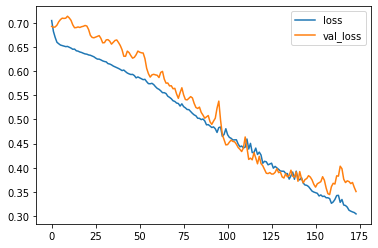

In [34]:
losses.plot()

In [35]:
# get the training paths
test_df = pd.read_csv('../simulations/data/test_paths.csv')

In [36]:
# get the training paths
test_x = test_df[test_df.columns[2:62]]

test_y = test_df['enter-parking'].values

In [37]:
test_x = scaler.transform(test_x)

In [38]:
print(test_x)

print(test_y)

[[ 0.08309383  0.27907406  0.          0.0847541   0.26916168  0.
   0.08424359  0.27091275  0.          0.10185985  0.26053305  0.
   0.11443243  0.24796299  0.          0.13076447  0.23828275  0.
   0.13804985  0.22145182  0.          0.13919562  0.21255668  0.
   0.14191511  0.20598149  0.          0.15599738  0.19829772  0.
   0.17322882  0.200434    0.          0.18702714  0.23252138  0.
   0.24086467  0.25765083  0.          0.29330415  0.28253905  0.
   0.32500031  0.30797846  0.          0.35237926  0.34384957  0.
   0.3755847   0.37685436  0.          0.42168233  0.38634985  0.
   0.45166237  0.40609338  0.          0.48530517  0.41183012  0.        ]
 [ 0.1053826   0.45708181  0.          0.11356683  0.44263712  0.
   0.1198803   0.42737734  0.          0.12784511  0.41517327  0.
   0.13778709  0.40634578  0.          0.14802496  0.40237595  0.
   0.14455081  0.38345365  0.          0.13813612  0.37873786  0.
   0.13425692  0.35972749  0.          0.14415255  0.33316848  0.
 

In [39]:
predictions = (model.predict(test_x) > 0.5).astype("int32")

print(predictions)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [40]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [41]:
print(confusion_matrix(test_y, predictions))

[[6 0]
 [0 9]]


In [42]:
# model.save('saved_model')